In [1]:
import pandas as pd
df=pd.read_csv("/kaggle/input/costa-rican-household-poverty-prediction/train.csv")
df_test=pd.read_csv("/kaggle/input/costa-rican-household-poverty-prediction/test.csv")


### Data Prepration

In [2]:
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Identify the output variable.

In [3]:
#checking the size
print(df.shape)
print(df_test.shape)

(9557, 143)
(23856, 142)


Train has 143 column where as test has 142 column ,which means train has output column on it.

In [4]:
#checking the output column my comparing the column names from both train and test
import numpy as np
np.setdiff1d(df.columns,df_test.columns)

array(['Target'], dtype=object)

## 1> Handling the missing value

In [5]:
#checking the missing value
def miss_val(df):
 # Miss_val = [col for col in df_test.columns if df[col].isnull().any() == True]
#print(Miss_val)
   miss_col=df[[col for col in df.columns if df[col].isnull().any() == True]].isna().sum()
#miss_col=df[[col for col in df.columns if df[col].isnull().any() == True]].isna().sum()
   return miss_col

print(miss_val(df))
print('*************')
print(miss_val(df_test))

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64
*************
v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64


### Handling the above 5 missing column:
out of those 5 ,'v2a1', 'v18q1', 'rez_esc',  has  almost 70% missing data .We will check what kind of data these fiels stores and if there is any way to fill all these null value.

rez_esc - Years behind in school

v18q1 - number of tablets household owns

v2a1 - Monthly rent payment

meaneduc:average years of education for adults


SQBmeaned:square of the mean years of education of adults (>=18) in the household



In [6]:
#Handling missing value in rez_esc
def miss_val_rez(df):
#df.rez_esc.value_counts()
 df.loc[((df['age'] >= 18) | (df['age'] < 5)) & (df['rez_esc'].isnull()), 'rez_esc'] = 0
 df.loc[df['rez_esc'] > 5, 'rez_esc'] = 5
 df['rez_esc'] = df['rez_esc'].fillna(0)
 return df.rez_esc.isna().sum()

print(miss_val_rez(df))
print(miss_val_rez(df_test))

0
0


In [7]:
#Handling missing value in v18q1
df['v18q1'] = df['v18q1'].fillna(0)
df_test['v18q1'] = df_test['v18q1'].fillna(0)

In [8]:
#Handling missing value in v2a1
# Fill in households that own the house with 0 rent payment

def miss_val_v2a1(df):
  df.loc[(df['tipovivi1'] == 1), 'v2a1'] = 0
  df['v2a1-miss'] = df['v2a1'].isnull()
  df['v2a1'] = df['v2a1'].fillna(0)
  return df.v2a1.isna().sum()
print(miss_val_v2a1(df))
print(miss_val_v2a1(df_test))

0
0


In [9]:
df[['meaneduc', 'SQBmeaned']].describe()

,meaneduc,SQBmeaned
count,9552.000000,9552.000000
mean,9.231523,102.588867
std,4.167694,93.516890
min,0.000000,0.000000
25%,6.000000,36.000000
50%,9.000000,81.000000
75%,11.600000,134.560010
max,37.000000,1369.000000


Both the column represent education ,so using simple imputer will work for us and also there is not much of a deviation in the data
'SQBmeaned' has outlier values ,so we will use simple imputer with median .Again there are multiple ways to do this but here we are using simpleimputer.

In [10]:
#handling missing values for column 'meaneduc', 'SQBmeaned' using iterative imputer


from sklearn.impute import SimpleImputer
import numpy as np

def miss_val_others(df):
  df1=df[['meaneduc', 'SQBmeaned']]
  Imp = SimpleImputer(missing_values=np.NaN, strategy='median')
  df2=pd.DataFrame(Imp.fit_transform(df1))
  df2.columns=['meaneduc', 'SQBmeaned']
#assigning values to the original dataframe
  df.meaneduc=df2.meaneduc
  df.SQBmeaned=df2.SQBmeaned
  
  return df[['meaneduc', 'SQBmeaned']].isna().sum()
print(miss_val_others(df))
print(miss_val_others(df_test))

meaneduc     0
SQBmeaned    0
dtype: int64
meaneduc     0
SQBmeaned    0
dtype: int64


In [11]:
#Final check of missing value  in both df and df_test data
print(df[[col for col in df.columns if df[col].isnull().any() == True]].isna().sum())
print(df_test[[col for col in df_test.columns if df_test[col].isnull().any() == True]].isna().sum())

Series([], dtype: float64)
Series([], dtype: float64)


## 2> Understanding the type of data for Model building 

In [12]:
# checking the datatypes of all the  features in the dataset
print(df_test.select_dtypes('object').shape)
print('********')
print(df_test.select_dtypes('int64').shape)
print('********')
print(df.select_dtypes('float').shape)
print('********')
print(df.select_dtypes('bool').shape)


(23856, 5)
********
(23856, 129)
********
(9557, 8)
********
(9557, 1)


Analysis:There are 130 integer columns, 8 float columns, and 5 object columns.

The object columns  cannot be fed directly into a machine learning model.So we neet to change the string value using label encoding or hot encoding.
 


In [13]:
# checking for categorical features in the dataset
df_test.select_dtypes('object').head()


,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


Analysis: Id and Idhogar are indentifiers.Id is for all the individual and idhogar is for all the individual houehold .Later we will drop these column  while defining x and y.

After analysing column  we found the other 3 columns (dependency,edjefe,edjefa) has a bunch of string and numbers .we will encode  no and yes to 0 and 1.We wn't worry about ID and Idhogar as they are just identifier columns



In [14]:
#replacing yes and no with 0 and 1 in the dataset
def encod_rep(df):
  df[['dependency','edjefe','edjefa']] = df[['dependency','edjefe','edjefa']].replace(['yes','no'],['1','0']).astype(np.float)
  return df.select_dtypes('object').head()
print(encod_rep(df))
print('*********')
print(encod_rep(df_test))

             Id    idhogar
0  ID_279628684  21eb7fcc1
1  ID_f29eb3ddd  0e5d7a658
2  ID_68de51c94  2c7317ea8
3  ID_d671db89c  2b58d945f
4  ID_d56d6f5f5  2b58d945f
*********
             Id    idhogar
0  ID_2f6873615  72958b30c
1  ID_1c78846d2  72958b30c
2  ID_e5442cf6a  72958b30c
3  ID_a8db26a79  5b598fbc9
4  ID_a62966799  1e2fc704e


## 3>Check if there are any biases in your dataset.

<AxesSubplot:xlabel='Target', ylabel='count'>

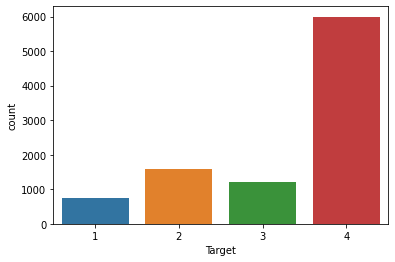

In [15]:
import seaborn as sns
sns.countplot(x="Target", data=df)

The data is divided into the below 4 categories.

1 : extreme  poor

2:  very poor

3:  poor

4:  middle class


The majority of our data comed under Traget=4 ,which makes this dataset as an imbalance data.We will use Random forest to handle the imbalance data.



#### Performance of the standard algorithm is not great on imbalanced classification problems,so we will use Random forest classifier for our data model.

## 4> Check if there is a house without a family head.

In [16]:
#checking the idhoghar without a famiily head.Idhogar is a family identifier.
def filter_nohead(df):
  A=df.groupby(['idhogar'])['parentesco1'].sum().to_frame('counta').reset_index()
  no_head=A[A.counta==0]
  no_head_l=list(no_head["idhogar"])
  df=df[~df["idhogar"].isin(no_head_l)]
  return df.shape
print(filter_nohead(df))
print(filter_nohead(df_test))


(9534, 144)
(23830, 143)


we have 23 household in df and 26 records in df_test  without a family head.We won't need these records for our model training and hence we have reomved it from our datset

## 5> Check whether all members of the house have the same poverty level(Target ).

In [17]:
#df.idhogar.value_counts().sort_values(ascending=False)
#Check whether all members of the house have the same poverty level or not 
df_check=df[['idhogar','parentesco1','Target']]
df_check_unique=df_check[['idhogar','Target']].drop_duplicates().groupby(['idhogar']).agg(['mean', 'count']).reset_index()
df_check_unique.columns=['idhogar','Targ_Mean','Tar_Count']
df_check_unique=df_check_unique[df_check_unique.Tar_Count>1]#if the mean 
df_check_unique.reset_index(drop=True, inplace=True)
df_check_unique 


,idhogar,Targ_Mean,Tar_Count
0,0172ab1d9,2.5,2
1,03f4e5f4d,1.5,2
2,0511912b6,3.5,2
3,078a0b6e2,1.5,2
4,09e25d616,1.5,2
...,...,...,...
80,e65d4b943,2.5,2
81,efd3aec61,2.5,2
82,f006348ed,2.5,2
83,f7b421c2c,1.5,2


idhogar column is a unique Household level identifier.We need to make sure that each idhogar has same 'Target' value.

#The logic : dropping all the duplicate row in df_check[['idhogar','Target']] will leave us with the idhogar where there are  more than one type of Target value.The count greater than 1 will give us all the idhogar where we have 2 Target values.

 
We can see that there are 85 idhoghar  where  the Target values are diffrent.To handle this ,we will assign the Target value of parentesco1,household head  of the same idhoghar 
 


## 6> Set poverty level of the members and the head of the house within a family.

In [18]:
#getting the target  for head parent for all those 85 idhoghar and creating a new dataframe
df_filter=df.idhogar.isin(df_check_unique.idhogar)
df_filter1=df[['idhogar','parentesco1','Target']][df_filter & df.parentesco1==1]
df_filter1.reset_index(drop=True, inplace=True)
df_filter1



,idhogar,parentesco1,Target
0,4b6077882,1,1
1,6833ac5dc,1,2
2,43b9c83e5,1,2
3,5c3f7725d,1,3
4,0f9494d3a,1,2
...,...,...,...
80,cc971b690,1,2
81,7e9d58c5c,1,2
82,e235a4eec,1,2
83,c7ce4e30c,1,2


In [19]:
#replacing df.Target  based on df_filter1 values
df1 = df.set_index('idhogar')
df2 = df_filter1.set_index('idhogar')
df1.update(df2)
df1.reset_index(inplace=True)


In [20]:
#checking the idhogar before and after logic:
print(df.Target[df.idhogar=='6833ac5dc'])
print(df1.Target[df1.idhogar=='6833ac5dc'])

285    2
286    2
287    2
288    2
289    2
290    1
Name: Target, dtype: int64
285    2.0
286    2.0
287    2.0
288    2.0
289    2.0
290    2.0
Name: Target, dtype: float64


In [21]:
#getting the x and y from df

x=df1.drop(columns=['Id','idhogar','Target'])
y=df1.Target

In [22]:
#getting th x from df_test for predicyion
x_t=df_test.drop(columns=['Id','idhogar'])
x_t.shape

(23856, 141)

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_X,test_x,train_Y,test_y=train_test_split(x,y,random_state=0)

In [24]:
#standerizing the data
stdSC=StandardScaler()
stdSC.fit(train_X)
train_new_X=pd.DataFrame(stdSC.transform(train_X))

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfModel=RandomForestClassifier(n_jobs=-1,n_estimators=200,random_state=7)
rfModel.fit(train_X,train_Y)
rfModel.score(train_X,train_Y)
rfModel.score(test_x,test_y)
#rfModel.predict(x_t)

0.9292887029288703

In [26]:
#Crosschecvking the accuracy of the model for both train and test
pd.crosstab(test_y,rfModel.predict(test_x))

col_0,1.0,2.0,3.0,4.0
Target,,,,
1.0,155,2,0,38
2.0,0,347,3,56
3.0,2,0,245,65
4.0,0,2,1,1474


In [27]:
#predicting the Target for test datset df_test
rfModel.predict(x_t)

array([4., 4., 4., ..., 4., 4., 4.])

In [28]:
df_test['Target']=pd.DataFrame(rfModel.predict(x_t))

In [29]:
df_test.to_csv("submission.csv",index=False)

Text(0.5, 1.0, 'Target for test')

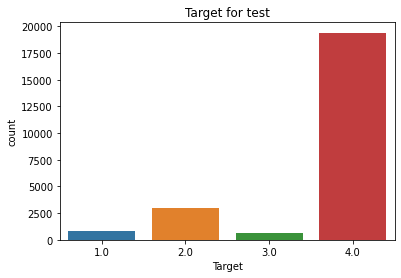

In [30]:
sns.countplot(x="Target", data=df_test).set_title('Target for test')